# Projeto C318 - Análise de Sentimento de Reviews da Steam
## Etapa 1: Análise Exploratória de Dados (EDA) e Pré-processamento

**Objetivo:** Carregar os dados brutos, entender a distribuição das classes (positivos/negativos), visualizar os termos mais frequentes e limpar o texto para a etapa de modelagem.

**Autores:** Bruna Soares Magalhães e Marcos Guerra Soares

---

### Importação de Bibliotecas e Configuração de Pastas

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
import nltk
from nltk.corpus import stopwords
import string
import os

# Baixando recursos necessários do NLTK
nltk.download('stopwords')
nltk.download('punkt')

# Configuração de Estilo dos Gráficos
sns.set(style="whitegrid")

print("Bibliotecas importadas e pastas verificadas com sucesso!")

Bibliotecas importadas e pastas verificadas com sucesso!


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\marco\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\marco\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


### Carregamento e Configuração das Colunas

In [8]:
# Caminho do arquivo original
dataset = '../data/raw/train.csv' 

# Mapeamento das colunas
COL_TEXTO = 'user_review'
COL_TARGET = 'user_suggestion'  # 1 = Recomendado, 0 = Não Recomendado
COL_TITULO = 'title'
COL_ANO = 'year'

try:
    df = pd.read_csv(dataset)
    print(f"Dataset carregado! Total de linhas: {len(df)}")
except FileNotFoundError:
    print(f"ERRO: Não encontrei o arquivo em '{dataset}'. Verifique o nome e a pasta.")

# Amostra
display(df.head())
print(df.info())

Dataset carregado! Total de linhas: 17494


,review_id,title,year,user_review,user_suggestion
0,1,Spooky's Jump Scare Mansion,2016.0,I'm scared and hearing creepy voices. So I'll...,1
1,2,Spooky's Jump Scare Mansion,2016.0,"Best game, more better than Sam Pepper's YouTu...",1
2,3,Spooky's Jump Scare Mansion,2016.0,"A littly iffy on the controls, but once you kn...",1
3,4,Spooky's Jump Scare Mansion,2015.0,"Great game, fun and colorful and all that.A si...",1
4,5,Spooky's Jump Scare Mansion,2015.0,Not many games have the cute tag right next to...,1


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17494 entries, 0 to 17493
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   review_id        17494 non-null  int64  
 1   title            17494 non-null  object 
 2   year             17316 non-null  float64
 3   user_review      17494 non-null  object 
 4   user_suggestion  17494 non-null  int64  
dtypes: float64(1), int64(2), object(2)
memory usage: 683.5+ KB
None


### Limpeza Inicial (Dados Nulos)

In [13]:
print("--- Verificando Nulos ---")
print(df[[COL_TEXTO, COL_TARGET, COL_TITULO]].isnull().sum())

# Removemos linhas onde não tem review ou não tem sugestão
df = df.dropna(subset=[COL_TEXTO, COL_TARGET])

# Garantir que o target e ano é inteiro (0 ou 1)
df[COL_TARGET] = df[COL_TARGET].astype(int)

print(f"Total após limpeza inicial: {len(df)}")

--- Verificando Nulos ---
user_review        0
user_suggestion    0
title              0
dtype: int64
Total após limpeza inicial: 17494


### EDA - Balanceamento das Classes (O Alvo)


Distribuição (1=Recomendado, 0=Não Recomendado):
user_suggestion
1    9968
0    7526
Name: count, dtype: int64


C:\Users\marco\AppData\Local\Temp\ipykernel_21264\741167435.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=COL_TARGET, data=df, palette='coolwarm')


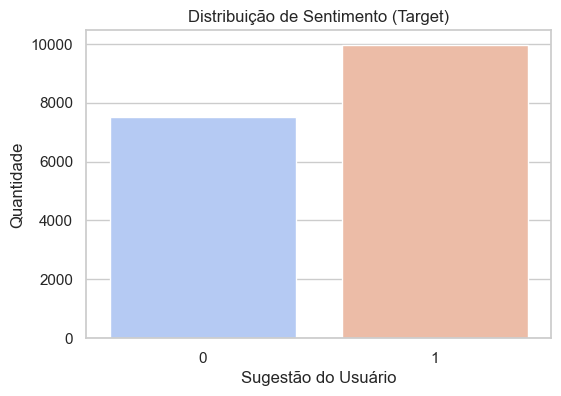

In [10]:
# Contagem de recomendados vs não recomendados
contagem = df[COL_TARGET].value_counts()
print("\nDistribuição (1=Recomendado, 0=Não Recomendado):")
print(contagem)

plt.figure(figsize=(6, 4))
sns.countplot(x=COL_TARGET, data=df, palette='coolwarm')
plt.title('Distribuição de Sentimento (Target)')
plt.xlabel('Sugestão do Usuário')
plt.ylabel('Quantidade')
plt.savefig('images/distribuicao_target.png')
plt.show()

### EDA - Análises Extras (Jogos e Anos)

C:\Users\marco\AppData\Local\Temp\ipykernel_21264\4148681743.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_jogos.values, y=top_jogos.index, palette='viridis')


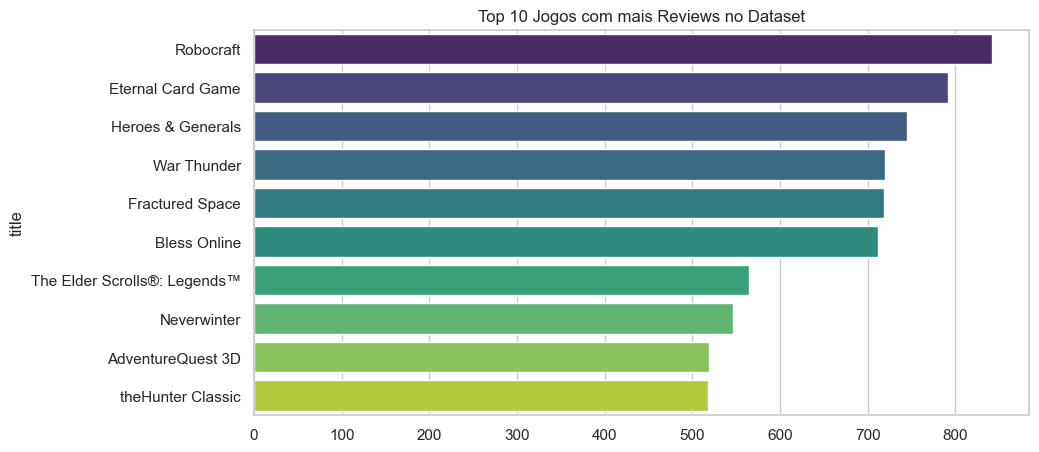

C:\Users\marco\AppData\Local\Temp\ipykernel_21264\4148681743.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=COL_ANO, data=df, palette='magma')


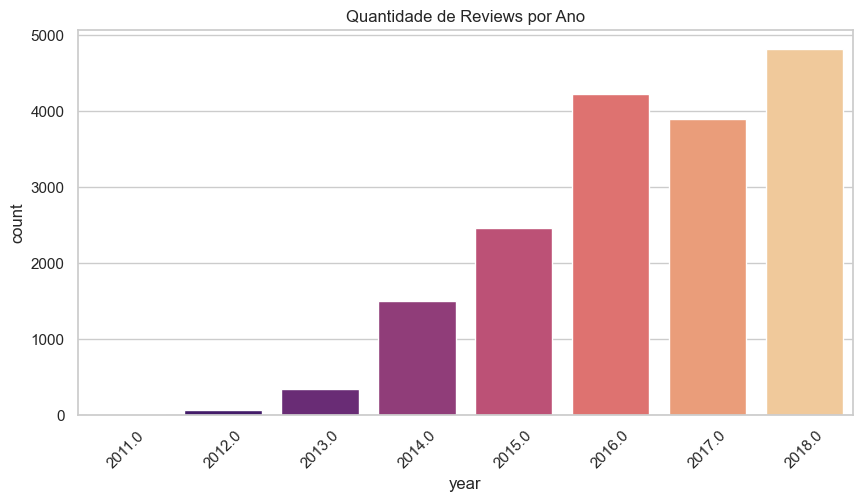

In [11]:
# Top 10 Jogos com mais reviews
top_jogos = df[COL_TITULO].value_counts().head(10)

plt.figure(figsize=(10, 5))
sns.barplot(x=top_jogos.values, y=top_jogos.index, palette='viridis')
plt.title('Top 10 Jogos com mais Reviews no Dataset')
plt.savefig('images/top_jogos.png')
plt.show()

# Reviews por Ano
if COL_ANO in df.columns:
    plt.figure(figsize=(10, 5))
    sns.countplot(x=COL_ANO, data=df, palette='magma')
    plt.title('Quantidade de Reviews por Ano')
    plt.xticks(rotation=45)
    plt.savefig('images/reviews_por_ano.png')
    plt.show()

### WordClouds (Positivo vs Negativo)

Gerando nuvens de palavras...


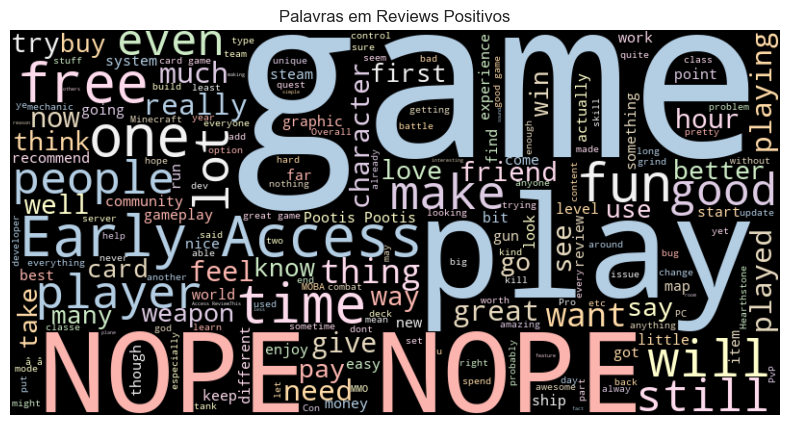

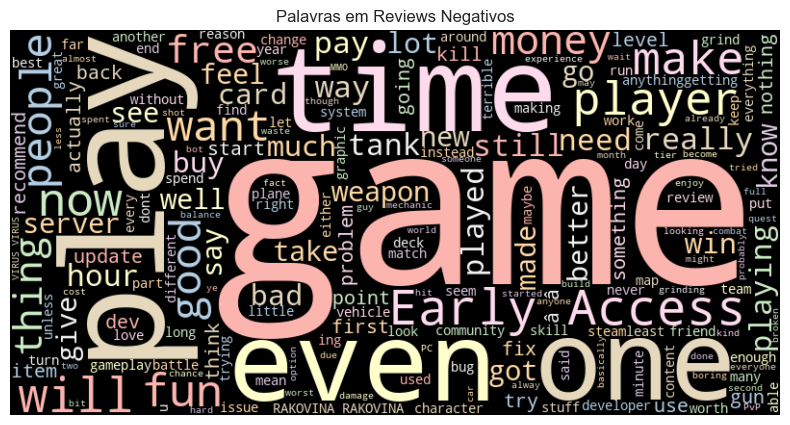

In [14]:
def plotar_nuvem(texto, titulo, arquivo):
    wordcloud = WordCloud(width=800, height=400, background_color='black', colormap='Pastel1').generate(texto)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(titulo)
    plt.savefig(f'images/{arquivo}')
    plt.show()

print("Gerando nuvens de palavras...")

# Texto dos Reviews Positivos (Target = 1)
txt_pos = " ".join(df[df[COL_TARGET] == 1][COL_TEXTO].astype(str))
plotar_nuvem(txt_pos, "Palavras em Reviews Positivos", "wordcloud_positive.png")

# Texto dos Reviews Negativos (Target = 0)
txt_neg = " ".join(df[df[COL_TARGET] == 0][COL_TEXTO].astype(str))
plotar_nuvem(txt_neg, "Palavras em Reviews Negativos", "wordcloud_negative.png")

### Pré-processamento (Limpeza do Texto)

In [15]:
stop_words = set(stopwords.words('english'))

def limpar_texto(texto):
    if not isinstance(texto, str): return ""
    # Minúsculas
    texto = texto.lower()
    # Remover pontuação
    texto = texto.translate(str.maketrans('', '', string.punctuation))
    # Remover stopwords
    palavras = texto.split()
    palavras_limpas = [p for p in palavras if p not in stop_words]
    
    return " ".join(palavras_limpas)

print("Iniciando limpeza do texto (pode demorar um pouco)...")
df['texto_limpo'] = df[COL_TEXTO].apply(limpar_texto)

print("Exemplo Final:")
print(f"Original: {df[COL_TEXTO].iloc[0]}")
print(f"Limpo:    {df['texto_limpo'].iloc[0]}")

Iniciando limpeza do texto (pode demorar um pouco)...
Exemplo Final:
Original: I'm scared and hearing creepy voices.  So I'll pause for a moment and write a review while I wait for my heart beat to return to atleast somewhat calmer times.  This game is adorable and creepy like my happy tree friends but with the graphics sceme of my childhood (but more bubble and 'clean').  Hello 1990's.What charactes there are (that isnot trying to kill me) were likable and a bit odd.  I did do a few noob things though, such as:Oh look a class room full of ghosts from dead children, lets shine my flashlight on them and stand there staring at them..Or, hmm creepy music, I'll turn around and see if I can see what's chasing me.Never before in a game have I been this afraid of finding a locked door.
Limpo:    im scared hearing creepy voices ill pause moment write review wait heart beat return atleast somewhat calmer times game adorable creepy like happy tree friends graphics sceme childhood bubble clean he

### Salvar Checkpoint

In [17]:
colunas_finais = ['texto_limpo', COL_TARGET] # Review processado e o Alvo

df[colunas_finais].to_csv('../data/processed/reviews_processed.csv', index=False)
print("Arquivo pronto para modelagem salvo em 'data/processed/reviews_processed.csv'")

Arquivo pronto para modelagem salvo em 'data/processed/reviews_processed.csv'
